<div style="background-color: lightblue; color: black; padding: 20px; font-weight: bold; font-size: 15px;">Extra Trees</div>

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">This notebook contains the centerpiece of our project. Here you can find the final model we decided on. <br><br>
First the data from feature engineering is read in, (please make sure to run notebook feature engineering extra trees first!) a train-test split is performed and SKlearn's ExtraTreesRegressor is used to predict sales figures for 2012.<br> 
After applying this algorithm with the default hyperparameters, a GridSearchCV is performed to tune the hyperparameters and refine our prediction. Then the algorithm is used again with these optimised hyperparameters. Furthermore, a randomised GridSearch is applied to see if good values for our model can be found outside the previously used range of hyperparameters.<br>
Finally, the results are displayed in lineplots so that the target weekly sales and the predicted target can be compared. In a final step, we show error plots. Here we have two scatter plots, one showing actual target and predicted target, while the other shows the residuals.<br><br>
Compared to our baseline model, we can improve our prediction by about 853USD for the validation data, while an improvement of about 1278USD was achieved for the test period. This means an improvement of the prediction in terms of mean weekly sales for the validation period by 5% and for the test period data by 7%.</div>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

RSEED=42

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Read data - Here: Data with 3x rolling shifted average & without store & department dummies</div>

In [4]:
df = pd.read_pickle('data/data_combined_clean_features_11.pkl')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Train test split</div>

In [5]:
#define train, validation and test dataset
train = df[df['Date'] < "2012-01-06"].reset_index(drop=True)
validation = df[(df['Date'] >= "2012-01-06") & (df['Date'] <= "2012-06-08")].reset_index(drop=True)
test = df[df['Date'] > "2012-06-08"].reset_index(drop=True)
 

#define features and target
X_train = train.drop(columns=['Weekly_Sales', 'Date'])
y_train = train['Weekly_Sales']

X_validation = validation.drop(columns=['Weekly_Sales', 'Date'])
y_validation = validation['Weekly_Sales']

X_test = test.drop(columns=['Weekly_Sales', 'Date'])
y_test = test['Weekly_Sales']  

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Extra Trees</div>

In [4]:
# instantiate model
model = ExtraTreesRegressor(
    n_estimators=100,
    random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Calculating metrics for Extra Trees</div>

In [6]:
# writing a function to get evaluation metrics for all data sets
def get_metrics(y, y_hat, data_kind):
    '''insert target, predicted target 
    and which kind of dataset as a string'''
    
    mean = y.mean()
    std = y.std()
    mse = mean_squared_error(y, y_hat)
    rmse = np.sqrt(mse)

    print(5*'- - ')
    print(f'Metrics for {data_kind}')
    print('Mean weekly sales:', mean.round(3))
    print('Standard deviation weekly sales:', std.round(3))
    print('MSE:', mse.round(3))
    print('RMSE:', rmse.round(3))
    print(5*'- - ')


In [7]:
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 0.0
RMSE: 0.0
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 10903347.483
RMSE: 3302.022
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7088504.117
RMSE: 2662.424
- - - - - - - - - - 


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">GridSearchCV</div>

In [ ]:
# Defining parameter grid (as dictionary)
param_grid = {
            "n_estimators" : [100, 125, 150],
            "max_depth" : [25, 30, 40],
            "min_samples_leaf" : [1, 2, 5, 6],
            "max_features" : [0.5, 1, 2, 'sqrt', 'log2'],
             }

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(ExtraTreesRegressor(random_state=RSEED), 
                     param_grid, 
                     scoring= "neg_root_mean_squared_error",
                     cv=2,
                     verbose=5,
                     n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
start = timer()
gs.fit(X_train, y_train)
end = timer()
gs_time = end-start


In [9]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: -5376.265
Best parameters: {'max_depth': 25, 'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 100}


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Extra Trees with tuned hyperparameter grid I</div>

In [15]:
# instantiate model
model = ExtraTreesRegressor(
    max_depth=25, 
    max_features=0.5, 
    min_samples_leaf=1, 
    n_estimators= 100,
    random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Calculating metrics for Extra Trees with tuned parameter grid I</div>

In [16]:
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 1190150.665
RMSE: 1090.94
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 11017994.196
RMSE: 3319.336
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7087163.445
RMSE: 2662.173
- - - - - - - - - - 


This model performs slightly worse on validation data (now: 3319 before: 3302) and just as well on test data. The advantage is that through regularisation using the hyperparameters - especially the max depth control -, the train data are no longer completely overfitted. 

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">GridSearchCV II</div><br>
Next, we investigate whether we can still find optimisation potential in the close vicinity of the present best parameters.

In [ ]:
# Defining parameter grid (as dictionary)
param_grid = {
            "n_estimators" : [90, 100, 110],
            "max_depth" : [22, 25, 28],
            "min_samples_leaf" : [1, 2],
            "max_features" : [0.3, 0.5, 0.7],
             }

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(ExtraTreesRegressor(random_state=RSEED), 
                     param_grid, 
                     scoring= "neg_root_mean_squared_error",
                     cv=2,
                     verbose=5,
                     n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
#start = timer()
gs.fit(X_train, y_train)
#end = timer()
#gs_time = end-start

In [5]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: -5376.265
Best parameters: {'max_depth': 25, 'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 100}


For the second gridsearch, the parameters were chosen closer to the ideal parameters of the first gridseach to see if a more ideal value could be found in the close vicinity of the values.  As no other values are issued, it was confirmed that the first values were already good.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Randomized GridSearch</div><br>
In the following we check whether there are more ideal values for the hyperparameters that we have not considered so far. For this purpose, we deliberately choose large ranges of values in which the Randomised GridSearch can be active.

In [ ]:
# Define parameter grid for randomized search
param_grid = {"n_estimators" : np.arange(1, 500, 5),
            "max_depth" : np.arange(1, 100, 5),
            "min_samples_leaf" : np.arange(1, 30, 2),
            "max_features" : np.arange(0.0001, 5, 2),
             }

# Instantiate random search and define the metric to optimize 
rs = RandomizedSearchCV(ExtraTreesRegressor(random_state=RSEED), 
                        param_grid, 
                        scoring='neg_root_mean_squared_error',
                        cv=2, 
                        verbose=5, 
                        n_jobs=-1, 
                        n_iter=200, 
                        random_state=RSEED)


# Fit randomized search object to data
rs.fit(X_train, y_train)


In [11]:
# Best score
print('Best score:', round(rs.best_score_, 3))

# Best parameters
print('Best parameters:', rs.best_params_)

Best score: -6668.239
Best parameters: {'n_estimators': 256, 'min_samples_leaf': 1, 'max_features': 0.0001, 'max_depth': 36}


In [14]:
# instantiate model
model = ExtraTreesRegressor(
    max_depth=36, 
    max_features=0.0001, 
    min_samples_leaf=1, 
    n_estimators= 256,
    random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

In [15]:
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 219756.816
RMSE: 468.782
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 13564372.92
RMSE: 3682.984
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7868424.003
RMSE: 2805.071
- - - - - - - - - - 


Since we do not get any better values, we hereby end the search for the best hyperparameters and return to our best model so far. We are going to run it once more to have the values available for plotting results and error analysis.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Best model</div>

In [7]:
# instantiate model
model = ExtraTreesRegressor(
    max_depth=25, 
    max_features=0.5, 
    min_samples_leaf=1, 
    n_estimators= 100,
    random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

In [8]:
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 1190150.665
RMSE: 1090.94
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 11017994.196
RMSE: 3319.336
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7087163.445
RMSE: 2662.173
- - - - - - - - - - 


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Adding predicted values to train, validation and test dataframe</div>

In [9]:
train['Predicted_Sales'] = y_pred_train
validation['Predicted_Sales'] = y_pred_validation
test['Predicted_Sales'] = y_pred_test

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Plotting actual target versus predicted target </div>

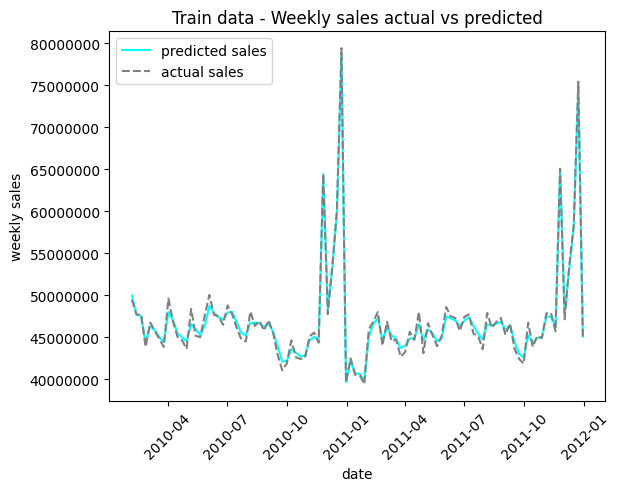

In [12]:
sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Predicted_Sales'].transform('sum'),
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', errorbar=None,
             color='grey', linestyle='--')
plt.title('Train data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

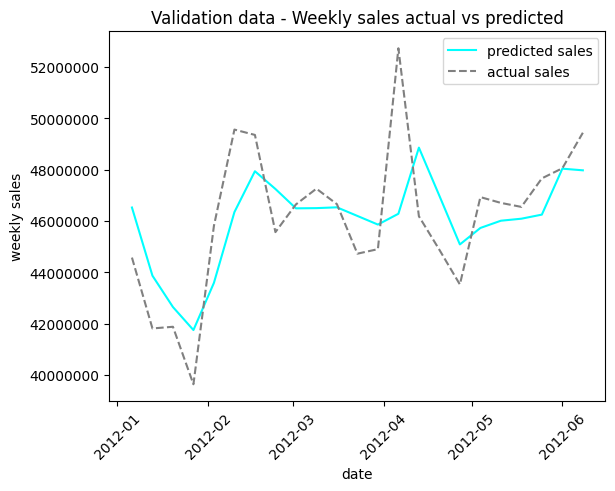

In [14]:
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', errorbar=None,
             color='grey', linestyle='--')
plt.title('Validation data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

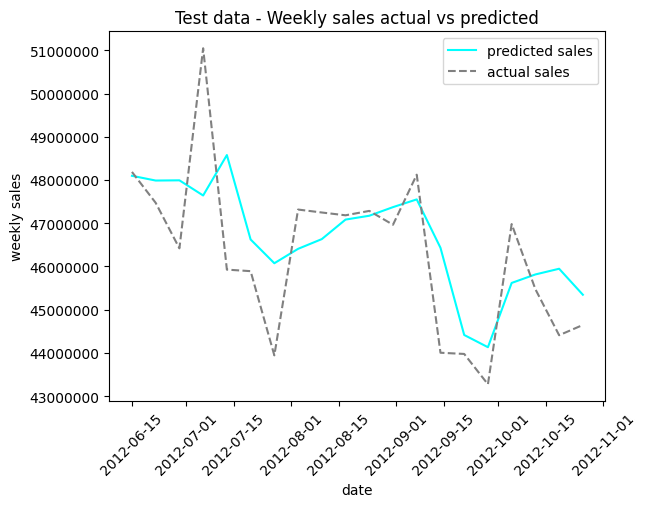

In [15]:
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Predicted_Sales'].transform('sum'),
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Weekly_Sales'].transform('sum'),
             label ='actual sales', errorbar=None,
             color='grey', linestyle='--')
plt.title('Test data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

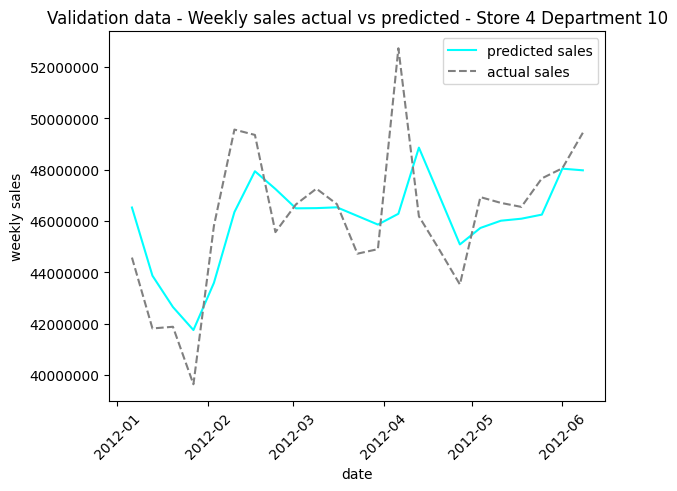

In [16]:
sns.lineplot(data=validation.query('Store==4 and Dept==10'), 
             x='Date', y=validation.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation.query('Store==4 and Dept==10'), 
             x='Date', y=validation.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', errorbar=None, 
             color='grey', linestyle='--')
plt.title('Validation data - Weekly sales actual vs predicted - Store 4 Department 10')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

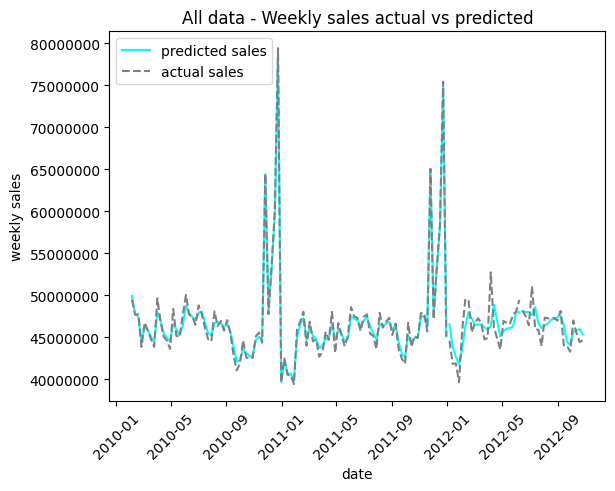

In [18]:
sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', color='grey', 
             linestyle='--', errorbar=None)
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             errorbar=None, color='cyan')
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             errorbar=None, color='grey', linestyle='--')
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             errorbar=None, color='cyan')
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             errorbar=None, color='grey', linestyle='--')
plt.title('All data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Error Analysis</div>

In [22]:
def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    #ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    #ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Error Analysis Train</div>

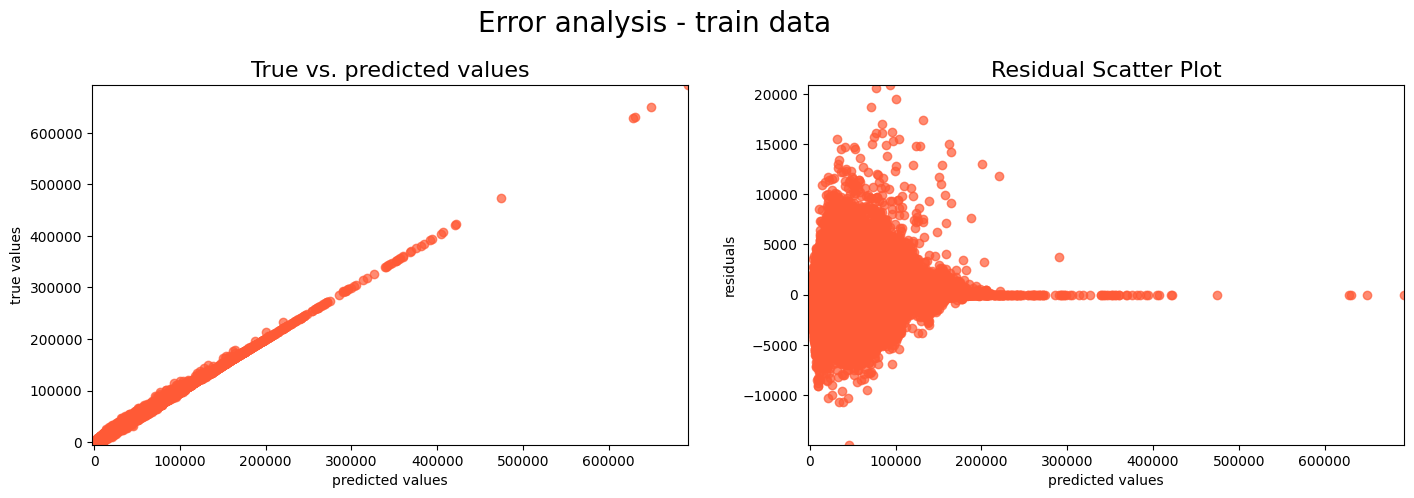

In [23]:
error_analysis(y_train, y_pred_train)
plt.suptitle('Error analysis - train data', fontsize=20)
plt.subplots_adjust(top=0.83);

In [17]:
train['Residuals'] = train.Weekly_Sales - train.Predicted_Sales
train.query('Residuals >= 13000 or Residuals <= -13000')

,Store,Dept,Date,Weekly_Sales,Fuel_Price,CPI,Unemployment,Size,Year,Temp_Celsius,...,Shifted_2,Shifted_3,Shifted_4,Std_Dev,EMA,IsHoliday_True,Type_B,Type_C,Predicted_Sales,Residuals
12648,2,92,2010-02-05,178982.89,2.572,210.752605,8.324,202307,2010,4.55,...,80550.34,85978.07,75717.24,4057.855566,80368.505608,0,0,0,164731.496076,14251.393924
12948,2,95,2010-02-05,143002.81,2.572,210.752605,8.324,202307,2010,4.55,...,73438.58,72994.42,62950.62,1480.588508,72060.417135,0,0,0,128191.880208,14810.929792
32478,6,9,2010-09-03,92984.54,2.577,213.051922,6.973,202505,2010,27.86,...,50056.04,45375.34,51514.20,2550.668962,50839.284875,0,0,0,76866.628722,16117.911278
35148,6,38,2010-02-05,100213.47,2.572,212.622352,7.259,202505,2010,4.68,...,4254.83,3932.88,3415.63,406.914865,4025.874205,0,0,0,84085.747705,16127.722295
37948,6,95,2010-02-05,90278.94,2.572,212.622352,7.259,202505,2010,4.68,...,43096.21,41269.45,37874.21,2012.083407,42058.349395,0,0,0,74585.199346,15693.740654
58348,10,23,2010-02-05,66322.90,2.962,126.442065,9.765,126512,2010,12.41,...,21332.07,22384.46,24392.67,970.460366,22773.172824,0,1,0,51603.825825,14719.074175
59448,10,34,2010-02-05,50585.42,2.962,126.442065,9.765,126512,2010,12.41,...,14465.38,9798.04,15088.34,2196.963671,12449.760120,0,1,0,36032.219864,14553.200136
60348,10,46,2010-02-05,55328.20,2.962,126.442065,9.765,126512,2010,12.41,...,9840.86,9281.77,10245.51,591.967815,9536.383813,0,1,0,40633.087318,14695.112682
67848,11,72,2010-02-05,114462.11,2.572,214.424881,7.368,207499,2010,7.80,...,10442.23,11298.10,11199.97,917.853287,10323.793306,0,0,0,93533.953107,20928.156893
81848,13,90,2010-02-05,111718.02,2.666,126.442065,8.316,219622,2010,-0.26,...,18904.97,20950.30,17702.25,908.309765,19195.757880,0,0,0,95467.180329,16250.839671


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Error Analysis Validation</div>

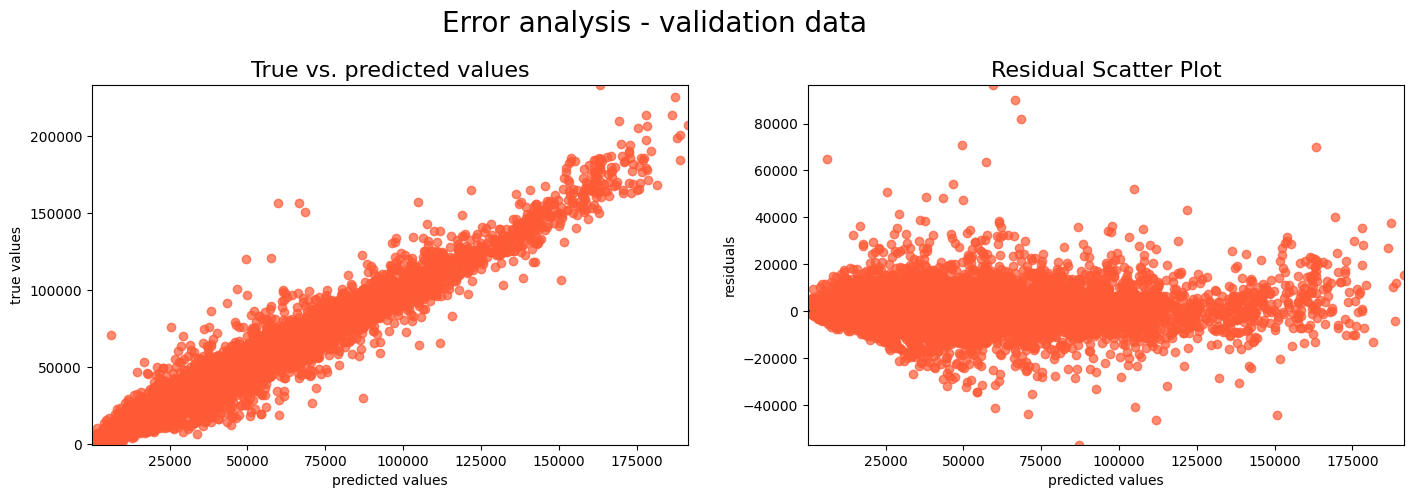

In [24]:
error_analysis(y_validation, y_pred_validation)
plt.suptitle('Error analysis - validation data', fontsize=20)
plt.subplots_adjust(top=0.83);

In [19]:
validation['Residuals'] = validation.Weekly_Sales - validation.Predicted_Sales
validation.query('Residuals >= 40000 or Residuals <= -40000')

,Store,Dept,Date,Weekly_Sales,Fuel_Price,CPI,Unemployment,Size,Year,Temp_Celsius,...,Shifted_2,Shifted_3,Shifted_4,Std_Dev,EMA,IsHoliday_True,Type_B,Type_C,Predicted_Sales,Residuals
12985,10,1,2012-04-06,120131.35,4.282,131.037548,7.382,126512,2012,18.88,...,38656.88,33728.46,39469.63,16038.194752,41426.401279,0,1,0,49458.232597,70673.117403
12987,10,1,2012-04-20,26759.76,4.111,131.117333,7.382,126512,2012,19.86,...,120131.35,38656.88,113431.75,34642.174142,63592.214819,0,1,0,70850.969500,-44091.209500
14145,10,72,2012-01-06,106488.92,3.443,130.157516,7.545,126512,2012,15.47,...,296628.29,158289.30,116112.11,179317.406622,206890.492350,0,1,0,150752.074800,-44263.154800
14150,10,72,2012-02-10,233140.32,3.722,130.384903,7.545,126512,2012,13.18,...,119192.07,124494.75,222651.02,65843.693768,155930.781260,1,1,0,163140.094300,70000.225700
17470,13,1,2012-04-06,150715.44,3.793,131.037548,5.965,219622,2012,9.36,...,53886.04,40317.99,51889.98,21903.086686,55057.784730,0,0,0,68623.676464,82091.763536
17472,13,1,2012-04-20,30200.67,3.845,131.117333,5.965,219622,2012,10.13,...,150715.44,53886.04,154137.88,40289.671706,77790.074627,0,0,0,87188.181700,-56987.511700
19057,14,1,2012-04-06,156677.00,3.996,190.685171,8.567,200898,2012,9.85,...,36999.06,26241.22,41257.36,16595.374048,36896.654675,0,0,0,66543.856955,90133.143045
19059,14,1,2012-04-20,18877.13,4.027,190.813801,8.567,200898,2012,17.29,...,156677.00,36999.06,133744.51,47560.775895,63977.294992,0,0,0,60262.673111,-41385.543111
20194,14,72,2012-01-06,65662.57,3.422,189.194056,8.424,200898,2012,2.16,...,254275.88,130873.98,82793.73,99743.561710,158683.085269,0,0,0,111958.894850,-46296.324850
24656,17,92,2012-01-06,100625.53,3.080,130.157516,6.403,93188,2012,-2.42,...,48376.41,54349.33,85408.58,9641.031690,50187.849262,0,1,0,46504.169142,54121.360858


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Error Analysis Test</div>

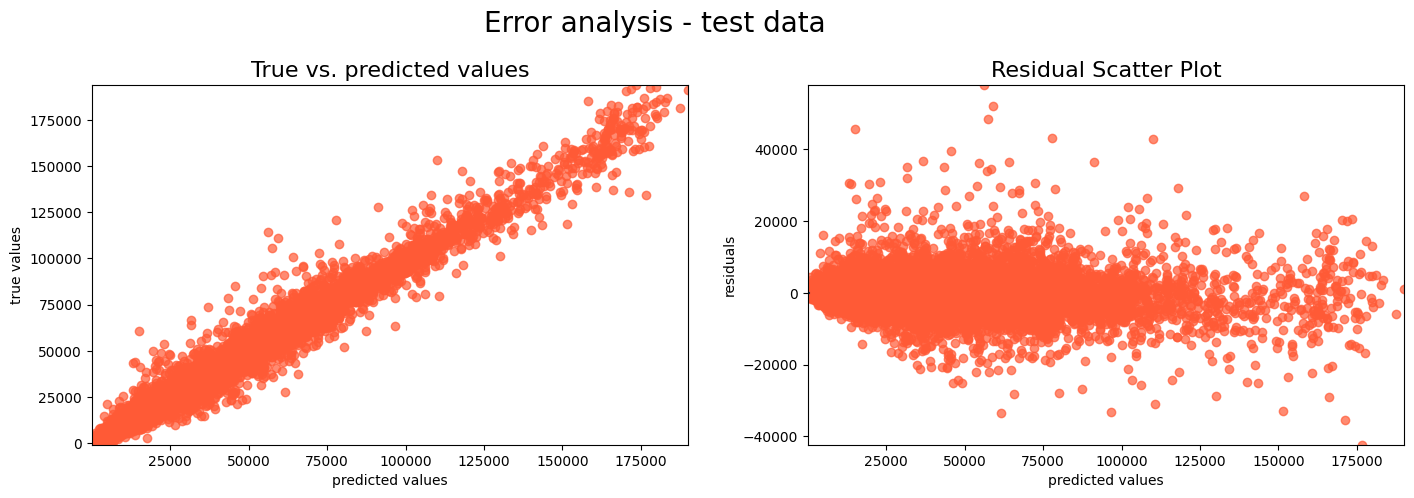

In [25]:
error_analysis(y_test, y_pred_test)
plt.suptitle('Error analysis - test data', fontsize=20)
plt.subplots_adjust(top=0.83);

In [60]:
test['Residuals'] = test.Weekly_Sales - test.Predicted_Sales
test.query('Residuals >= 30000 or Residuals <= -30000')

,Store,Dept,Date,Weekly_Sales,Fuel_Price,CPI,Unemployment,Size,Year,Temp_Celsius,...,Shifted_2,Shifted_3,Shifted_4,Std_Dev,EMA,IsHoliday_True,Type_B,Type_C,Predicted_Sales,Residuals
3889,4,3,2012-08-17,103193.89,3.552,130.790968,4.077,205863,2012,27.45,...,53930.14,43033.44,84831.20,22485.057712,39299.363667,0,0,0,72510.339014,30683.550986
4854,4,72,2012-09-21,127832.24,3.721,131.010333,4.077,205863,2012,20.54,...,83037.90,93412.45,84069.95,4351.505167,90518.039062,0,0,0,91352.724554,36479.515446
6511,6,9,2012-08-31,90721.84,3.638,223.921012,5.668,202505,2012,28.66,...,44580.41,46379.75,84949.44,2426.064205,49158.249684,0,0,0,54513.183640,36208.656360
11324,10,3,2012-07-13,66648.72,3.723,130.683000,7.170,126512,2012,32.11,...,19413.13,20305.49,60392.02,2129.646874,20541.372149,0,1,0,31486.562343,35162.157657
11327,10,3,2012-08-03,120827.95,3.595,130.737871,7.170,126512,2012,29.31,...,95892.91,24333.94,84428.19,36301.459844,53322.412300,0,1,0,77769.239900,43058.710100
15231,13,3,2012-08-31,91139.25,3.624,130.885355,5.765,219622,2012,26.21,...,61621.65,41921.85,46171.23,16092.046278,45396.529879,0,0,0,57122.088475,34017.161525
15232,13,3,2012-09-07,114230.60,3.689,130.932548,5.765,219622,2012,21.47,...,73306.98,49595.56,27062.40,20359.520354,54545.073903,1,0,0,56211.069042,58019.530958
15270,13,5,2012-08-24,73550.30,3.582,130.838161,5.765,219622,2012,25.21,...,41564.10,29763.69,33201.57,4115.103067,37101.066143,0,0,0,36877.443702,36672.856298
17781,14,92,2012-06-22,134236.16,3.564,191.064610,8.567,200898,2012,23.46,...,206575.90,180251.98,166873.16,19115.758467,179208.301891,0,0,0,176534.187612,-42298.027612
17782,14,92,2012-06-29,135790.38,3.506,191.099246,8.567,200898,2012,24.01,...,160550.27,165598.92,175468.71,23901.747351,170213.873513,0,0,0,171175.829100,-35385.449100


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Merge validation and test</div>

In [20]:
validation_and_test = pd.concat([validation, test], axis=0)

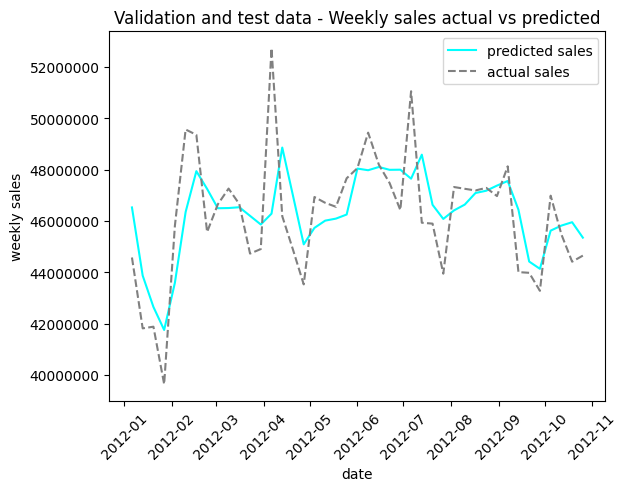

In [22]:
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', color='grey', 
             linestyle='--', errorbar=None)
plt.title('Validation and test data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Nicer looking plot for presentation</div>

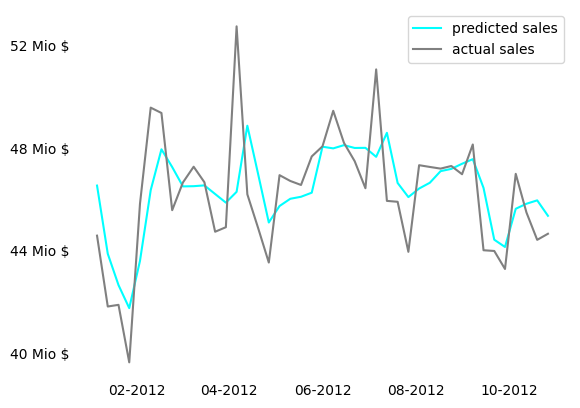

In [ ]:
#plotting lines for predicted and actual sales
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', color='grey', 
             errorbar=None) #linestyle='--', 

# y ticks formatting
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x / 1e6:.0f} Mio $')
ytick_positions = [plt.gca().get_yticks()[1], plt.gca().get_yticks()[3], 
                   plt.gca().get_yticks()[5], plt.gca().get_yticks()[7]]

plt.gca().set_yticks(ytick_positions)
plt.gca().tick_params(axis='y', which='both', length=0)

# x ticks formatting
from matplotlib.dates import DateFormatter
date_format = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_format)

xtick_positions = [plt.gca().get_xticks()[1], plt.gca().get_xticks()[3], 
                   plt.gca().get_xticks()[5], plt.gca().get_xticks()[7],
                   plt.gca().get_xticks()[9]]

plt.gca().set_xticks(xtick_positions)
plt.gca().tick_params(axis='x', which='both', length=0)

sns.despine(top=True, right=True, left=True, bottom=True)
#plt.title('Validation and test data - Weekly sales actual vs predicted')
plt.ylabel('')#weekly sales
plt.xlabel('')#Date
#plt.xticks(rotation=45)
plt.legend();
#plt.ticklabel_format(style='plain', axis='y')